### Importing dependency

In [35]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import os

### Loading annotation dataset

In [36]:
image_df = pd.read_csv('WebMarket_coco_gt_object.csv')

In [37]:
image_df

,image_name,x1,y1,x2,y2,class
0,db1.jpg,1105,919,1315,1127,object
1,db1.jpg,191,1242,398,1469,object
2,db1.jpg,1587,697,1906,761,object
3,db1.jpg,1541,442,1845,541,object
4,db1.jpg,1252,505,1398,761,object
...,...,...,...,...,...,...
118383,db2700.jpg,2481,677,2592,1005,object
118384,db2700.jpg,54,1127,254,1524,object
118385,db2700.jpg,16,1683,302,1939,object
118386,db2700.jpg,546,1686,834,1944,object


### Draw rectangles

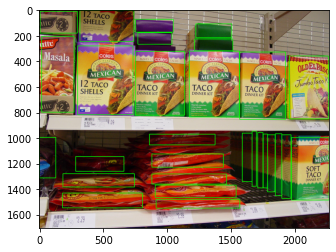

In [38]:
# draws rectangles on images
def draw_rec(image):
    path  = os.path.join('data base\db1', image)
    img = cv.imread(path)
    #cv.imshow('image', img )
    #cv.waitKey(0)
    #cv.destroyAllWindows()
    #extracting the cordinates
    img_rect_cords = image_df[image_df.image_name==image]
    #drawing the rectangles
    for i in range(len(img_rect_cords)):
        x1, y1, x2, y2 = (img_rect_cords.iloc[i,1:5].values) 
        cv.rectangle(img,(x1, y1), (x2, y2), (0,255,0), thickness=3)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img,)
    
draw_rec('db300.jpg')

In [39]:
image_df

,image_name,x1,y1,x2,y2,class
0,db1.jpg,1105,919,1315,1127,object
1,db1.jpg,191,1242,398,1469,object
2,db1.jpg,1587,697,1906,761,object
3,db1.jpg,1541,442,1845,541,object
4,db1.jpg,1252,505,1398,761,object
...,...,...,...,...,...,...
118383,db2700.jpg,2481,677,2592,1005,object
118384,db2700.jpg,54,1127,254,1524,object
118385,db2700.jpg,16,1683,302,1939,object
118386,db2700.jpg,546,1686,834,1944,object


In [40]:
name = image_df['image_name']

In [41]:
# apply regex create new numbers coloumn for sorting purpose
import re
num=[]  
for i in name:
    temp = re.findall(r'\d+', i)
    res = list(map(int, temp))
    num.append(res)
numbers = pd.DataFrame(num)
numbers

,0
0,1
1,1
2,1
3,1
4,1
...,...
118383,2700
118384,2700
118385,2700
118386,2700


In [42]:
image_df['numbers'] = numbers
image_df

,image_name,x1,y1,x2,y2,class,numbers
0,db1.jpg,1105,919,1315,1127,object,1
1,db1.jpg,191,1242,398,1469,object,1
2,db1.jpg,1587,697,1906,761,object,1
3,db1.jpg,1541,442,1845,541,object,1
4,db1.jpg,1252,505,1398,761,object,1
...,...,...,...,...,...,...,...
118383,db2700.jpg,2481,677,2592,1005,object,2700
118384,db2700.jpg,54,1127,254,1524,object,2700
118385,db2700.jpg,16,1683,302,1939,object,2700
118386,db2700.jpg,546,1686,834,1944,object,2700


In [43]:
# Add width and height coloumns in dataframe
image_df["width"]= 2272
image_df["height"] = 1704

In [44]:
# Sort the whole pandas dataset from one coloumn 'numbers' in assending order 
image_df2 = image_df.sort_values("numbers")
print(image_df2)

       image_name    x1    y1    x2    y2   class  numbers  width  height
0         db1.jpg  1105   919  1315  1127  object        1   2272    1704
19        db1.jpg  1005  1271  1166  1363  object        1   2272    1704
20        db1.jpg   600  1365   745  1494  object        1   2272    1704
21        db1.jpg   945  1370  1123  1508  object        1   2272    1704
22        db1.jpg  1536  1432  1898  1522  object        1   2272    1704
...           ...   ...   ...   ...   ...     ...      ...    ...     ...
35311  db3153.jpg   793   567   882   749  object     3153   2272    1704
35310  db3153.jpg  1277  1007  1388  1151  object     3153   2272    1704
35309  db3153.jpg  1576   943  1676  1073  object     3153   2272    1704
35315  db3153.jpg    28  1008   134  1222  object     3153   2272    1704
35358  db3153.jpg   171    13   312   123  object     3153   2272    1704

[118388 rows x 9 columns]


In [45]:
# slice the dataframe
image_df3 = image_df2[image_df2.numbers<=300]

In [46]:
# Drop the number coloumn
image_df3= image_df3.drop(["numbers"],axis=1)
image_df3

,image_name,x1,y1,x2,y2,class,width,height
0,db1.jpg,1105,919,1315,1127,object,2272,1704
19,db1.jpg,1005,1271,1166,1363,object,2272,1704
20,db1.jpg,600,1365,745,1494,object,2272,1704
21,db1.jpg,945,1370,1123,1508,object,2272,1704
22,db1.jpg,1536,1432,1898,1522,object,2272,1704
...,...,...,...,...,...,...,...,...
8743,db300.jpg,917,1479,1573,1548,object,2272,1704
8744,db300.jpg,1977,997,2272,1485,object,2272,1704
8745,db300.jpg,1902,975,1974,1472,object,2272,1704
8746,db300.jpg,1851,967,1902,1451,object,2272,1704


In [47]:
image_df3.columns = ['filename','xmin', 'ymin', 'xmax', 'ymax', 'class', 'width', 'height']
image_df3

,filename,xmin,ymin,xmax,ymax,class,width,height
0,db1.jpg,1105,919,1315,1127,object,2272,1704
19,db1.jpg,1005,1271,1166,1363,object,2272,1704
20,db1.jpg,600,1365,745,1494,object,2272,1704
21,db1.jpg,945,1370,1123,1508,object,2272,1704
22,db1.jpg,1536,1432,1898,1522,object,2272,1704
...,...,...,...,...,...,...,...,...
8743,db300.jpg,917,1479,1573,1548,object,2272,1704
8744,db300.jpg,1977,997,2272,1485,object,2272,1704
8745,db300.jpg,1902,975,1974,1472,object,2272,1704
8746,db300.jpg,1851,967,1902,1451,object,2272,1704


### Final dataframe as tf object detection csv

In [48]:
image_df3 = image_df3[['filename','width','height','class','xmin','ymin','xmax','ymax']]#changing the index of coloumns
image_df3

,filename,width,height,class,xmin,ymin,xmax,ymax
0,db1.jpg,2272,1704,object,1105,919,1315,1127
19,db1.jpg,2272,1704,object,1005,1271,1166,1363
20,db1.jpg,2272,1704,object,600,1365,745,1494
21,db1.jpg,2272,1704,object,945,1370,1123,1508
22,db1.jpg,2272,1704,object,1536,1432,1898,1522
...,...,...,...,...,...,...,...,...
8743,db300.jpg,2272,1704,object,917,1479,1573,1548
8744,db300.jpg,2272,1704,object,1977,997,2272,1485
8745,db300.jpg,2272,1704,object,1902,975,1974,1472
8746,db300.jpg,2272,1704,object,1851,967,1902,1451


### Save the dataframe

In [49]:
image_df3.to_csv('db1_image_annotation.csv', index=False)